In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
# Importing the dataset
iris_df = pd.read_csv('Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Check for missing values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
#Create X features and y target
X = iris_df.iloc[:, 1:5]
y = iris_df.iloc[:, 5]

In [5]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [6]:
# Creating the classifier and fitting it to the training set
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [7]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

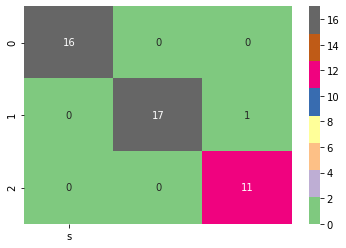

In [8]:
#Visualize The Confusion Matrix Using a heatmap
sns.heatmap(cm, annot= True, fmt='', cmap='Accent',  xticklabels='s', yticklabels='auto')

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Accuracy: 97.77777777777777


Our model accuracy is 97, 77 %.

Text(0.5, 1.0, 'Important Features Visualization')

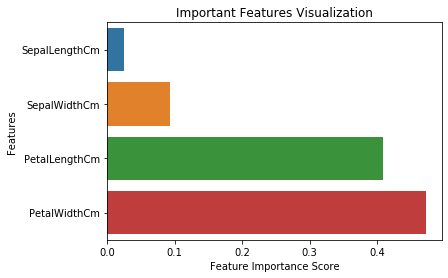

In [10]:
#Let's see which features are important

#Create object with feature names
feature_cols = iris_df.columns[1:5]
feature_cols

feature_importance = pd.Series(classifier.feature_importances_,index= feature_cols).sort_values(ascending=True)
feature_importance

#Visualise Feature importance 
sns.barplot(x=feature_importance ,y=feature_cols)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features Visualization")

As we can see from the above barplot, SepalLength is the least important feature.